# Predicting Heart Disease

Image

Author: Xiaohua Su

Date: May 17th, 2022

# Overview

As of 2020, heart disease is the leading cause of death in the US, with the disease claiming close to 700,000 that year. It is the leading cause of death regardless of gender and for most race/ethnicity. This disease can lead to early death in individuals, increase medicial visits and a lost of productivity in our economy. As such, it is important to try to address this.


# Business Problem

With how prevalent heart disease is in the nation, it is important for doctors to discuss with their patients about early prevention. In order to do this, doctors would need to know more about a patient’s history in order to diagnose them with having heart disease, potentially requiring blood work in addition. Getting the results from the blood work usually happens after the patient’s is already out of the doctor’s office. Calls will then be made to discuss these results and potential follow up appointments will be made. 

Our model aims to predict whether a patient, who comes into a doctor’s office/hospital, has heart disease. By being able to predict if the patient has heart disease or not, we can then flag this patient for the doctor electronically. Instead of having to waiting for a phone call for a discussion on, that may not be between the patient and doctor, conversation between the doctor and patient about managing heart disease can begin. This flagging can help start the conversation between the doctor and patient about early prevention steps that can be made and can help lead the doctor in asking certain questions for further verification and testing.

# Data

The data was taken from the [CDC's 2020 Behavorial Risk Factor Surveillance System](https://www.cdc.gov/brfss/annual_data/annual_2020.html) (BRFSS). Due to how large the data is, this data was not uploaded to the github but can be found where the data was taken underneath the data files section.

It is a survey data performed between 2020 to 2021 from the CDC to monitor people's health-behavior, chronic health conditions, and use of services to help manage their disease. The data contains information of the individual such as `race` and `gender` that we will not use to avoid these biases in our models. A new column was created as the data does not specifically have a column called heart disease but instead has two two columns called `cvdinfr4` and `cvdcrhd4` that corresponded with whether the individual was ever told/diagnose with having a heart attack and told that they had coronary heart disease. Both questions, get at the issue of heart disease.

# Data Prep

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#display all columns in dataframe
pd.set_option('display.max_columns', None)

## Inspection of Original Dataset

In [3]:
#load the data
df = pd.read_sas('./LLCP2020.XPT')

C:\Users\xiao\anaconda3\envs\phase5\lib\site-packages\pandas\io\sas\sas_xport.py:475: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  df[x] = v


In [4]:
#Inspect the data
df

,_STATE,FMONTH,IDATE,IMONTH,IDAY,IYEAR,DISPCODE,SEQNO,_PSU,CTELENM1,PVTRESD1,COLGHOUS,STATERE1,CELPHONE,LADULT1,COLGSEX,NUMADULT,LANDSEX,NUMMEN,NUMWOMEN,RESPSLCT,SAFETIME,CTELNUM1,CELLFON5,CADULT1,CELLSEX,PVTRESD3,CCLGHOUS,CSTATE1,LANDLINE,HHADULT,SEXVAR,GENHLTH,PHYSHLTH,MENTHLTH,POORHLTH,HLTHPLN1,PERSDOC2,MEDCOST,CHECKUP1,EXERANY2,SLEPTIM1,CVDINFR4,CVDCRHD4,CVDSTRK3,ASTHMA3,ASTHNOW,CHCSCNCR,CHCOCNCR,CHCCOPD2,HAVARTH4,ADDEPEV3,CHCKDNY2,DIABETE4,DIABAGE3,LASTDEN4,RMVTETH4,MARITAL,EDUCA,RENTHOM1,NUMHHOL3,NUMPHON3,CPDEMO1B,VETERAN3,EMPLOY1,CHILDREN,INCOME2,PREGNANT,WEIGHT2,HEIGHT3,DEAF,BLIND,DECIDE,DIFFWALK,DIFFDRES,DIFFALON,SMOKE100,SMOKDAY2,STOPSMK2,LASTSMK2,USENOW3,ALCDAY5,AVEDRNK3,DRNK3GE5,MAXDRNKS,FLUSHOT7,FLSHTMY3,SHINGLE2,PNEUVAC4,FALL12MN,FALLINJ4,SEATBELT,DRNKDRI2,HADMAM,HOWLONG,HADPAP2,LASTPAP2,HPVTEST,HPLSTTST,HADHYST2,PCPSAAD3,PCPSADI1,PCPSARE1,PSATEST1,PSATIME,PCPSARS1,COLNSCPY,COLNTEST,SIGMSCPY,SIGMTEST,BLDSTOL1,LSTBLDS4,STOOLDNA,SDNATEST,VIRCOLON,VCLNTEST,HIVTST7,HIVTSTD3,HIVRISK5,PDIABTST,PREDIAB1,INSULIN1,BLDSUGAR,FEETCHK3,DOCTDIAB,CHKHEMO3,FEETCHK,EYEEXAM1,DIABEYE,DIABEDU,TOLDCFS,HAVECFS,WORKCFS,TOLDHEPC,TRETHEPC,PRIRHEPC,HAVEHEPC,HAVEHEPB,MEDSHEPB,HLTHCVR1,CIMEMLOS,CDHOUSE,CDASSIST,CDHELP,CDSOCIAL,CDDISCUS,CAREGIV1,CRGVREL4,CRGVLNG1,CRGVHRS1,CRGVPRB3,CRGVALZD,CRGVPER1,CRGVHOU1,CRGVEXPT,ECIGARET,ECIGNOW,MARIJAN1,USEMRJN2,RSNMRJN1,LCSFIRST,LCSLAST,LCSNUMCG,LCSCTSCN,CNCRDIFF,CNCRAGE,CNCRTYP1,CSRVTRT3,CSRVDOC1,CSRVSUM,CSRVRTRN,CSRVINST,CSRVINSR,CSRVDEIN,CSRVCLIN,CSRVPAIN,CSRVCTL2,PCPSADE1,PCDMDEC1,HPVADVC4,HPVADSHT,TETANUS1,IMFVPLA1,BIRTHSEX,SOMALE,SOFEMALE,TRNSGNDR,ACEDEPRS,ACEDRINK,ACEDRUGS,ACEPRISN,ACEDIVRC,ACEPUNCH,ACEHURT1,ACESWEAR,ACETOUCH,ACETTHEM,ACEHVSEX,RCSGENDR,RCSRLTN2,CASTHDX2,CASTHNO2,QSTVER,QSTLANG,_METSTAT,_URBSTAT,MSCODE,_STSTR,_STRWT,_RAWRAKE,_WT2RAKE,_IMPRACE,_CHISPNC,_CRACE1,_CPRACE,_CLLCPWT,_DUALUSE,_DUALCOR,_LLCPWT2,_LLCPWT,_RFHLTH,_PHYS14D,_MENT14D,_HCVU651,_TOTINDA,_MICHD,_LTASTH1,_CASTHM1,_ASTHMS1,_DRDXAR2,_EXTETH3,_ALTETH3,_DENVST3,_PRACE1,_MRACE1,_HISPANC,_RACE,_RACEG21,_RACEGR3,_RACEPRV,_SEX,_AGEG5YR,_AGE65YR,_AGE80,_AGE_G,HTIN4,HTM4,WTKG3,_BMI5,_BMI5CAT,_RFBMI5,_CHLDCNT,_EDUCAG,_INCOMG,_SMOKER3,_RFSMOK3,DRNKANY5,DROCDY3_,_RFBING5,_DRNKWK1,_RFDRHV7,_FLSHOT7,_PNEUMO3,_RFSEAT2,_RFSEAT3,_DRNKDRV,_RFMAM22,_MAM5023,_RFPAP35,_RFPSA23,_CLNSCPY,_SGMSCPY,_SGMS10Y,_RFBLDS4,_STOLDNA,_VIRCOLN,_SBONTIM,_CRCREC1,_AIDTST4
0,1.0,1.0,b'01042020',b'01',b'04',b'2020',1100.0,b'2020000001',2.020000e+09,1.0,1.0,NaN,1.0,2.0,1.0,NaN,1.0,2.0,5.397605e-79,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,2.0,3.0,30.0,3.0,2.0,3.0,1.0,4.0,1.0,5.0,2.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,35.0,1.0,2.0,2.0,6.0,1.0,2.0,NaN,1.0,2.0,4.0,88.0,1.0,NaN,106.0,507.0,2.0,2.0,1.0,2.0,2.0,2.0,1.0,1.0,2.0,NaN,3.0,888.0,NaN,NaN,NaN,2.0,NaN,2.0,2.0,88.0,NaN,1.0,NaN,1.0,3.0,1.0,4.0,2.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,4.0,2.0,NaN,2.0,NaN,2.0,NaN,2.0,NaN,1.0,21994.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,7.0,2.0,1.0,1.0,2.0,2.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,1.0,2.0,1.0,1.0,1.0,3.0,3.0,3.0,2.0,NaN,NaN,NaN,NaN,10.0,1.0,1.0,1.0,1.0,11011.0,69.640207,1.0,69.640207,1.0,NaN,NaN,NaN,NaN,1.0,0.465411,460.002849,284.335672,1.0,2.0,3.0,2.0,1.0,2.0,2.0,2.0,1.0,1.0,2.0,NaN,1.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0,2.0,8.0,1.0,56.0,5.0,67.0,170.0,4808.0,1660.0,1.0,1.0,1.0,4.0,1.0,1.0,2.0,2.0,5.397605e-79,1.0,5.397605e-79,1.0,NaN,NaN,1.0,1.0,9.0,2.0,2.0,NaN,NaN,1.0,3.0,3.0,3.0,3.0,3.0,3.0,1.0,1.0
1,1.0,1.0,b'02072020',b'02',b'07',b'2020',1200.0,b'2020000002',2.020000e+09,1.0,1.0,NaN,1.0,2.0,1.0,NaN,1.0,2.0,5.397605e-79,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,3.0,88.0,88.0,NaN,1.0,1.0,1.0,1.0,1.0,7.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,1.0,1.0,2.0,3.0,NaN,1.0,1.0,3.0,6.0,1.0,1.0,1.0,1.0,2.0,7.0,88.0,99.0,NaN,170.0,504.0,2.0,2.0,2.0,2.0,2.0,2.0,NaN,NaN

In [5]:
#cleaning the columns names up for easier access
df.columns = [name.strip().lower() for name in df.columns]

After looking at the data, it is clear that the code book is required to figure out what each column represents. Not only that, but it will be benefical to rename these columns after cleaning and dropping some of them.

In [6]:
#verifying that this frequency matches with what's written in the code book
#looking at the years this survey was conducted
df.iyear.value_counts()

b'2020'    389826
b'2021'     12132
Name: iyear, dtype: int64

In [7]:
#heart attacks
df.cvdinfr4.value_counts(normalize= True)

2.0    0.940207
1.0    0.054626
7.0    0.004381
9.0    0.000786
Name: cvdinfr4, dtype: float64

In [8]:
df.cvdinfr4.isnull().sum()

6

In [9]:
#Coronary Heart Disease
df.cvdcrhd4.value_counts(normalize= True)

2.0    0.935572
1.0    0.056220
7.0    0.007369
9.0    0.000838
Name: cvdcrhd4, dtype: float64

1 = yes,  2 = no,  7 = Don't know/Not sure ,   9 = refused

We will look at the heart disease which is defined by the CDC as : stuff. As such, it is reasonable that we will combine heart attacks and coronary heart disease into a new column called heart disease after initial cleaning.

In [10]:
#creation of the heart_disease column
conditions = [
    (df.cvdcrhd4 == 1),
    (df.cvdinfr4 == 1)
]

values = [1,1]

df['heart_disease'] = np.select(conditions, values)

<ipython-input-10-0f8c6b629796>:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  df['heart_disease'] = np.select(conditions, values)


In [11]:
df.heart_disease.value_counts()

0    367795
1     34163
Name: heart_disease, dtype: int64

In [12]:
df.duplicated()

0         False
1         False
2         False
3         False
4         False
          ...  
401953    False
401954    False
401955    False
401956    False
401957    False
Length: 401958, dtype: bool

***After looking at the code book.*** These will be are potential columns, I will want to keep as they can be/ are related to heart disease. Some are potentially environmental factors such as income. Some features while related to heart disease were a bit too fine grain for the business problem and or were not asked to the individual as it does not apply to them. As such, there 50% or more of missing or blanks and imputing would skew it highly: 

- GENHLTH : general health; Would you say that in general your health is

- PHYSHLTH : Number of Days Physical Health Not Good; Now thinking about your physical health, which includes physical illness and injury, for how many days during the past 30 days was your physical health not good? 

- MENTHLTH : Number of Days Mental Health Not Good; Now thinking about your mental health, which includes stress, depression, and problems with emotions, for how many days during the past 30 days was your mental health not good? 


- POORHLTH : Poor Physical or Mental Health; During the past 30 days, for about how many days did poor physical or mental health keep you from doing your usual activities, such as self-care, work, or recreation? 

- HLTHPLN1 :  Have any health care coverage

- PERSDOC2 : Multiple Health Care Professionals ; Do you have one person you think of as your personal doctor or health care - provider? (If ´No´ ask ´Is there more than one or is there no person who you think of as your personal doctor or health care provider?´.)

- MEDCOST : past 12 months, Could Not See Doctor Because of Cost

- CHECKUP1 : Length of time since last routine checkup

- EXERANY2 : : Exercise in Past 30 Days 

- SLEPTIM1 : How Much Time Do You Sleep 

- CVDSTRK3 : Ever Diagnosed with a Stroke

- ASTHMA3 : Ever Told Had Asthma 

- ASTHNOW  : Still Have Asthma 

- CHCSCNCR : (Ever told) you had skin cancer

- CHCOCNCR : (Ever told) you had any other types of cancer?

- CHCCOPD2 : (Ever told) (you had) chronic obstructive pulmonary disease, C.O.P.D., emphysema or chronic bronchitis?

- HAVARTH4 : Told Had Arthritis; (Ever told) (you had) some form of arthritis, rheumatoid arthritis, gout, lupus, or fibromyalgia? (Arthritis diagnoses include: rheumatism, polymyalgia rheumatica; osteoarthritis (not osteporosis); tendonitis, bursitis, bunion,tennis elbow; carpal tunnel syndrome, tarsal tunnel syndrome; joint infection, etc.)

-  ADDEPEV3 : (Ever told) (you had) a depressive disorder (including depression, major depression, dysthymia, or minor depression)?

- CHCKDNY2 : Ever told you have kidney disease?

- DIABETE4: (Ever told) you had diabetes; (Ever told) (you had) diabetes? (If ´Yes´ and respondent is female, ask ´Was this only when you were pregnant?´. If Respondent says pre-diabetes or borderline diabetes, use response code 4.)

- EDUCA : Education Level

- RENTHOM1 : Own or Rent Home

- EMPLOY1 :  Employment Status

- INCOME2 : Income Level 

- WEIGHT2 : : Reported Weight in Pounds

- HEIGHT3 :  Reported Height in Feet and Inches 

- DIFFWALK : : Difficulty Walking or Climbing Stairs

- SMOKE100 : SMOKE100; Have you smoked at least 100 cigarettes in your entire life? [Note: 5 packs = 100 cigarettes] 

- USENOW3 :  Use of Smokeless Tobacco Products; Do you currently use chewing tobacco, snuff, or snus every day, some days, or not at all? (Snus (Swedish for snuff) is a moist smokeless tobacco, usually sold in small pouches that are placed under the lip against the gum.)[Snus
(rhymes with ´goose´)]

- ALCDAY5 : Days in past 30 had alcoholic beverage 

- HIVRISK5 : Do Any High Risk Situations Apply

- ECIGARET : Ever used an e-cigarette?

All other columns will be droppped as they contained information that will either introduce biass into the models such as the`imrace` and `colgsex` which refer to race and gender respectively, or they are finer details about some the columns above where over half the respondents had were not asked as it did not pertain to them, nor did I think it would be helpful to the model. Further columns will be drop in the process if they contained too many nulls or if later on it is determined that it's too similar to another features. No cleaning was done on the original dataset as we still need to create our heart disease dataframe.

## Creation of Heart Disease Dataset

In [13]:
#Creating a heart_disease specific data frame
heart_df = df[['genhlth', 'physhlth', 'menthlth', 'poorhlth', 'hlthpln1' , 'persdoc2' , 'medcost' , 'checkup1' ,
                  'exerany2' , 'sleptim1' , 'cvdstrk3' , 'asthma3' , 'chcscncr' , 'chcocncr' , 'chccopd2' , 'havarth4' ,
                  'addepev3' , 'chckdny2' , 'diabete4' , 'educa' , 'renthom1' , 'employ1' , 'income2' , 'weight2' ,
                  'height3' , 'diffwalk' , 'smoke100' , 'usenow3' , 'alcday5' , 'hivrisk5' , 'ecigaret' ,
              'cvdcrhd4', 'cvdinfr4' , 'heart_disease']]

In [14]:
heart_df

,genhlth,physhlth,menthlth,poorhlth,hlthpln1,persdoc2,medcost,checkup1,exerany2,sleptim1,cvdstrk3,asthma3,chcscncr,chcocncr,chccopd2,havarth4,addepev3,chckdny2,diabete4,educa,renthom1,employ1,income2,weight2,height3,diffwalk,smoke100,usenow3,alcday5,hivrisk5,ecigaret,cvdcrhd4,cvdinfr4,heart_disease
0,2.0,3.0,30.0,3.0,2.0,3.0,1.0,4.0,1.0,5.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,6.0,1.0,4.0,1.0,106.0,507.0,2.0,1.0,3.0,888.0,2.0,1.0,2.0,2.0,0
1,3.0,88.0,88.0,NaN,1.0,1.0,1.0,1.0,1.0,7.0,2.0,1.0,2.0,2.0,2.0,1.0,1.0,2.0,3.0,6.0,1.0,7.0,99.0,170.0,504.0,2.0,NaN,NaN,NaN,NaN,NaN,2.0,2.0,0
2,3.0,88.0,88.0,NaN,1.0,1.0,2.0,1.0,1.0,7.0,2.0,2.0,2.0,1.0,2.0,1.0,2.0,2.0,3.0,5.0,1.0,7.0,7.0,7777.0,508.0,2.0,2.0,3.0,888.0,2.0,2.0,2.0,2.0,0
3,1.0,88.0,88.0,NaN,1.0,3.0,2.0,2.0,2.0,6.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,3.0,4.0,1.0,5.0,99.0,9999.0,9999.0,2.0,2.0,3.0,888.0,2.0,2.0,2.0,2.0,0
4,2.0,88.0,88.0,NaN,1.0,1.0,2.0,1.0,1.0,7.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,3.0,6.0,2.0,7.0,77.0,126.0,506.0,2.0,2.0,3.0,888.0,2.0,2.0,2.0,2.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
401953,3.0,88.0,88.0,NaN,2.0,1.0,2.0,2.0,1.0,6.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,3.0,5.0,1.0,1.0,99.0,120.0,411.0,2.0,2.0,3.0,888.0,2.0,NaN,2.0,2.0,0
401954,3.0,88.0,88.0,NaN,1.0,1.0,2.0,3.0,2.0,12.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,3.0,3.0,2.0,5.0,4.0,168.0,500.0,2.0,2.0,3.0,888.0,2.0,NaN,2.0,2.0,0
401955,3.0,88.0,88.0,NaN,1.0,1.0,2.0,2.0,1.0,8.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,3.0,4.0,1.0,5.0,1.0,159.0,401.0,2.0,2.0,3.0,888.0,2.0,NaN,2.0,2.0,0
401956,3.0,88.0,88.0,NaN,1.0,1.0,2.0,1.0,1.0,6.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,3.0,6.0,1.0,1.0,99.0,175.0,508.0,2.0,7.0,3.0,101.0,2.0,NaN,2.0,2.0,0


### Renaming our columns

Due to the nature of some of the column names, it is difficult to keep track of what some of these names represent. As such, they will be renamed into more interpretable name.

In [15]:
heart_df.rename(columns = { 'genhlth': 'general_health',
                           'physhlth': 'physical_health',
                           'menthlth': 'mental_health',
                           'poorhlth' : 'poor_health30',
                           'hlthpln1': 'health_insurance',
                           'persdoc2':'health_care_doctors',
                           'medcost':'no_doc_bc_cost',
                           'checkup1':'last_checkup',
                           'exerany2':'excercise_30',
                           'sleptim1':'sleep',
                           'cvdstrk3':'stroke',
                           'asthma3':'asthma',
                           'chcscncr':'skin_cancer',
                           'chcocncr':'other_cancer',
                           'chccopd2':'copd_type_issue',
                           'havarth4':'arthritis_anyform',
                           'addepev3':'depressive_disorder',
                           'chckdny2':'kidney_disease',
                           'diabete4':'diabetes',
                           'educa':'education_lvl',
                           'renthom1':'rent_own',
                           'employ1':'employment_status',
                           'income2':'income_level',
                           'weight2':'weight_lbs',
                           'height3':'height_ftandinch',
                           'diffwalk':'difficulty_walking',
                           'smoke100':'smoke100_lifetime',
                           'usenow3':'smokeless_tobacco_products',
                           'alcday5':'alcohol_consumption_30',
                           'hivrisk5':'high_risk_situations',
                           'cvdcrhd4':'coronary_heart_disease',
                           'cvdinfr4':'heart_attack',
                          }, inplace = True)

C:\Users\xiao\anaconda3\envs\phase5\lib\site-packages\pandas\core\frame.py:5039: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


In [16]:
heart_df

,general_health,physical_health,mental_health,poor_health30,health_insurance,health_care_doctors,no_doc_bc_cost,last_checkup,excercise_30,sleep,stroke,asthma,skin_cancer,other_cancer,copd_type_issue,arthritis_anyform,depressive_disorder,kidney_disease,diabetes,education_lvl,rent_own,employment_status,income_level,weight_lbs,height_ftandinch,difficulty_walking,smoke100_lifetime,smokeless_tobacco_products,alcohol_consumption_30,high_risk_situations,ecigaret,coronary_heart_disease,heart_attack,heart_disease
0,2.0,3.0,30.0,3.0,2.0,3.0,1.0,4.0,1.0,5.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,6.0,1.0,4.0,1.0,106.0,507.0,2.0,1.0,3.0,888.0,2.0,1.0,2.0,2.0,0
1,3.0,88.0,88.0,NaN,1.0,1.0,1.0,1.0,1.0,7.0,2.0,1.0,2.0,2.0,2.0,1.0,1.0,2.0,3.0,6.0,1.0,7.0,99.0,170.0,504.0,2.0,NaN,NaN,NaN,NaN,NaN,2.0,2.0,0
2,3.0,88.0,88.0,NaN,1.0,1.0,2.0,1.0,1.0,7.0,2.0,2.0,2.0,1.0,2.0,1.0,2.0,2.0,3.0,5.0,1.0,7.0,7.0,7777.0,508.0,2.0,2.0,3.0,888.0,2.0,2.0,2.0,2.0,0
3,1.0,88.0,88.0,NaN,1.0,3.0,2.0,2.0,2.0,6.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,3.0,4.0,1.0,5.0,99.0,9999.0,9999.0,2.0,2.0,3.0,888.0,2.0,2.0,2.0,2.0,0
4,2.0,88.0,88.0,NaN,1.0,1.0,2.0,1.0,1.0,7.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,3.0,6.0,2.0,7.0,77.0,126.0,506.0,2.0,2.0,3.0,888.0,2.0,2.0,2.0,2.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
401953,3.0,88.0,88.0,NaN,2.0,1.0,2.0,2.0,1.0,6.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,3.0,5.0,1.0,1.0,99.0,120.0,411.0,2.0,2.0,3.0,888.0,2.0,NaN,2.0,2.0,0
401954,3.0,88.0,88.0,NaN,1.0,1.0,2.0,3.0,2.0,12.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,3.0,3.0,2.0,5.0,4.0,168.0,500.0,2.0,2.0,3.0,888.0,2.0,NaN,2.0,2.0,0
401955,3.0,88.0,88.0,NaN,1.0,1.0,2.0,2.0,1.0,8.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,3.0,4.0,1.0,5.0,1.0,159.0,401.0,2.0,2.0,3.0,888.0,2.0,NaN,2.0,2.0,0
401956,3.0,88.0,88.0,NaN,1.0,1.0,2.0,1.0,1.0,6.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,3.0,6.0,1.0,1.0,99.0,175.0,508.0,2.0,7.0,3.0,101.0,2.0,NaN,2.0,2.0,0


### Cleaning our target

Because our heart disease was created on the condition that someone responded yes to either they had a heart attack or has coronary heart disease, every row is filled in. When in reality there is some nulls in both the heart attack and coronary heart disease column.

In [17]:
heart_df.heart_attack.value_counts()

2.0    377918
1.0     21957
7.0      1761
9.0       316
Name: heart_attack, dtype: int64

In [18]:
heart_df.heart_attack.isna().sum()

6

In [19]:
#dropping the nulls
heart_df.dropna(subset= ['heart_attack', 'coronary_heart_disease'], inplace = True)

C:\Users\xiao\anaconda3\envs\phase5\lib\site-packages\pandas\util\_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


In [20]:
heart_df.heart_attack.isna().sum()

0

In [21]:
heart_df.coronary_heart_disease.value_counts()

2.0    376056
1.0     22597
7.0      2962
9.0       337
Name: coronary_heart_disease, dtype: int64

In [22]:
heart_df.coronary_heart_disease.isna().sum()

0

Because these were used to create our target and is a bit more detailed. We willl be removing the individuals that refused to answer or were unsured as we want our target `heart_disease` to represent answers to either response as either a yes or no.

In [23]:
#subsetting where they responded with either 1, 2
heart_df = heart_df[(heart_df['heart_attack'] != 7.0) & (heart_df['heart_attack'] != 9.0)]

In [24]:
heart_df.heart_attack.value_counts()

2.0    377918
1.0     21957
Name: heart_attack, dtype: int64

In [25]:
#subsetting where they responded with either 1, 2
heart_df = heart_df[(heart_df['coronary_heart_disease'] != 7.0) & (heart_df['coronary_heart_disease'] != 9.0)]

In [26]:
heart_df.coronary_heart_disease.value_counts()

2.0    374854
1.0     22293
Name: coronary_heart_disease, dtype: int64

In [27]:
heart_df

,general_health,physical_health,mental_health,poor_health30,health_insurance,health_care_doctors,no_doc_bc_cost,last_checkup,excercise_30,sleep,stroke,asthma,skin_cancer,other_cancer,copd_type_issue,arthritis_anyform,depressive_disorder,kidney_disease,diabetes,education_lvl,rent_own,employment_status,income_level,weight_lbs,height_ftandinch,difficulty_walking,smoke100_lifetime,smokeless_tobacco_products,alcohol_consumption_30,high_risk_situations,ecigaret,coronary_heart_disease,heart_attack,heart_disease
0,2.0,3.0,30.0,3.0,2.0,3.0,1.0,4.0,1.0,5.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,6.0,1.0,4.0,1.0,106.0,507.0,2.0,1.0,3.0,888.0,2.0,1.0,2.0,2.0,0
1,3.0,88.0,88.0,NaN,1.0,1.0,1.0,1.0,1.0,7.0,2.0,1.0,2.0,2.0,2.0,1.0,1.0,2.0,3.0,6.0,1.0,7.0,99.0,170.0,504.0,2.0,NaN,NaN,NaN,NaN,NaN,2.0,2.0,0
2,3.0,88.0,88.0,NaN,1.0,1.0,2.0,1.0,1.0,7.0,2.0,2.0,2.0,1.0,2.0,1.0,2.0,2.0,3.0,5.0,1.0,7.0,7.0,7777.0,508.0,2.0,2.0,3.0,888.0,2.0,2.0,2.0,2.0,0
3,1.0,88.0,88.0,NaN,1.0,3.0,2.0,2.0,2.0,6.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,3.0,4.0,1.0,5.0,99.0,9999.0,9999.0,2.0,2.0,3.0,888.0,2.0,2.0,2.0,2.0,0
4,2.0,88.0,88.0,NaN,1.0,1.0,2.0,1.0,1.0,7.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,3.0,6.0,2.0,7.0,77.0,126.0,506.0,2.0,2.0,3.0,888.0,2.0,2.0,2.0,2.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
401953,3.0,88.0,88.0,NaN,2.0,1.0,2.0,2.0,1.0,6.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,3.0,5.0,1.0,1.0,99.0,120.0,411.0,2.0,2.0,3.0,888.0,2.0,NaN,2.0,2.0,0
401954,3.0,88.0,88.0,NaN,1.0,1.0,2.0,3.0,2.0,12.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,3.0,3.0,2.0,5.0,4.0,168.0,500.0,2.0,2.0,3.0,888.0,2.0,NaN,2.0,2.0,0
401955,3.0,88.0,88.0,NaN,1.0,1.0,2.0,2.0,1.0,8.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,3.0,4.0,1.0,5.0,1.0,159.0,401.0,2.0,2.0,3.0,888.0,2.0,NaN,2.0,2.0,0
401956,3.0,88.0,88.0,NaN,1.0,1.0,2.0,1.0,1.0,6.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,3.0,6.0,1.0,1.0,99.0,175.0,508.0,2.0,7.0,3.0,101.0,2.0,NaN,2.0,2.0,0


In [28]:
heart_df.heart_disease.value_counts()

0    364224
1     32923
Name: heart_disease, dtype: int64

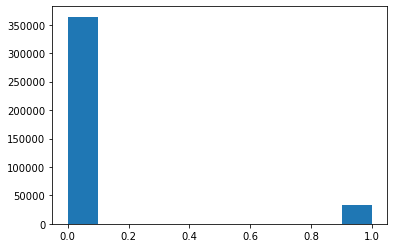

In [29]:
plt.hist(heart_df.heart_disease);

### Looking at our columns

In [30]:
heart_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 397147 entries, 0 to 401957
Data columns (total 34 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   general_health              397142 non-null  float64
 1   physical_health             397145 non-null  float64
 2   mental_health               397145 non-null  float64
 3   poor_health30               198652 non-null  float64
 4   health_insurance            397147 non-null  float64
 5   health_care_doctors         397147 non-null  float64
 6   no_doc_bc_cost              397147 non-null  float64
 7   last_checkup                397145 non-null  float64
 8   excercise_30                397147 non-null  float64
 9   sleep                       397147 non-null  float64
 10  stroke                      397147 non-null  float64
 11  asthma                      397147 non-null  float64
 12  skin_cancer                 397147 non-null  float64
 13  other_cancer  

In [31]:
heart_df.general_health.value_counts()

2.0    137284
3.0    117842
1.0     81305
4.0     45040
5.0     14807
7.0       599
9.0       265
Name: general_health, dtype: int64

In [32]:
heart_df.poor_health30.value_counts()

88.0    110022
30.0     14776
2.0      10534
5.0       8454
1.0       7954
15.0      7175
3.0       6894
10.0      6743
7.0       4204
20.0      4145
77.0      3956
4.0       3845
14.0      2315
25.0      1464
6.0       1200
99.0      1000
8.0        992
12.0       639
21.0       511
28.0       328
9.0        227
18.0       192
16.0       178
29.0       135
17.0       124
27.0       115
13.0       111
22.0       106
11.0        89
26.0        77
24.0        67
23.0        44
19.0        36
Name: poor_health30, dtype: int64

In [33]:
heart_df.poor_health30.isna().sum()

198495

Close to half of the individuals were not asked this question or it's missing. Those that responded, majority fall into the none category. We will drop this column instead of imputing it as 'not applicable' since ~200k missing values is close to half of our dataset and that would not be a continous value.

In [34]:
heart_df.drop(columns= ['poor_health30'], inplace = True)

In [35]:
heart_df.head()

,general_health,physical_health,mental_health,health_insurance,health_care_doctors,no_doc_bc_cost,last_checkup,excercise_30,sleep,stroke,asthma,skin_cancer,other_cancer,copd_type_issue,arthritis_anyform,depressive_disorder,kidney_disease,diabetes,education_lvl,rent_own,employment_status,income_level,weight_lbs,height_ftandinch,difficulty_walking,smoke100_lifetime,smokeless_tobacco_products,alcohol_consumption_30,high_risk_situations,ecigaret,coronary_heart_disease,heart_attack,heart_disease
0,2.0,3.0,30.0,2.0,3.0,1.0,4.0,1.0,5.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,6.0,1.0,4.0,1.0,106.0,507.0,2.0,1.0,3.0,888.0,2.0,1.0,2.0,2.0,0
1,3.0,88.0,88.0,1.0,1.0,1.0,1.0,1.0,7.0,2.0,1.0,2.0,2.0,2.0,1.0,1.0,2.0,3.0,6.0,1.0,7.0,99.0,170.0,504.0,2.0,NaN,NaN,NaN,NaN,NaN,2.0,2.0,0
2,3.0,88.0,88.0,1.0,1.0,2.0,1.0,1.0,7.0,2.0,2.0,2.0,1.0,2.0,1.0,2.0,2.0,3.0,5.0,1.0,7.0,7.0,7777.0,508.0,2.0,2.0,3.0,888.0,2.0,2.0,2.0,2.0,0
3,1.0,88.0,88.0,1.0,3.0,2.0,2.0,2.0,6.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,3.0,4.0,1.0,5.0,99.0,9999.0,9999.0,2.0,2.0,3.0,888.0,2.0,2.0,2.0,2.0,0
4,2.0,88.0,88.0,1.0,1.0,2.0,1.0,1.0,7.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,3.0,6.0,2.0,7.0,77.0,126.0,506.0,2.0,2.0,3.0,888.0,2.0,2.0,2.0,2.0,0


In [36]:
heart_df.physical_health.value_counts()

88.0    276247
30.0     24310
2.0      17696
1.0      12401
3.0      10252
5.0       9065
77.0      6777
10.0      6595
15.0      6102
7.0       5624
4.0       5336
20.0      3914
14.0      3511
6.0       1508
99.0      1489
25.0      1416
8.0       1118
21.0       758
12.0       730
28.0       560
29.0       258
9.0        229
18.0       211
16.0       170
27.0       155
17.0       126
13.0       113
22.0       106
11.0       104
24.0        85
26.0        80
23.0        60
19.0        39
Name: physical_health, dtype: int64

In [37]:
heart_df.physical_health.isna().sum()

2

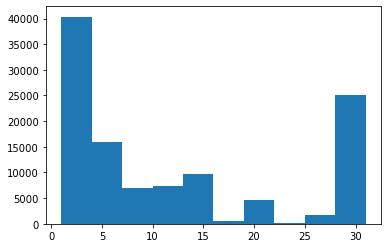

In [38]:
plt.hist(heart_df.physical_health, range = (1,31));

Alot of people stated none (88) for physhealth. Will need to recode 88 to 0 to ensure that if any scaling is done, we don't get insane pulling. Not only that but 0 makes sense as they've 0 days out of 30 days of bad physical health.

In [39]:
heart_df.mental_health.value_counts()

88.0    252839
30.0     21870
2.0      19425
5.0      16570
10.0     12513
3.0      12389
15.0     11882
1.0      11044
20.0      6469
7.0       6463
4.0       6285
77.0      5570
14.0      2453
25.0      2357
99.0      1985
6.0       1775
8.0       1297
12.0       897
28.0       631
21.0       426
29.0       389
18.0       249
9.0        246
16.0       189
27.0       164
17.0       155
13.0       134
22.0       113
11.0       106
24.0        87
23.0        75
26.0        74
19.0        24
Name: mental_health, dtype: int64

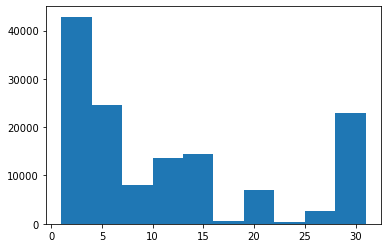

In [40]:
plt.hist(heart_df.mental_health, range = (1,31));

#### Alcohol

In [41]:
heart_df.alcohol_consumption_30.value_counts()

888.0    180723
201.0     27462
202.0     21047
101.0     16027
230.0     15558
102.0     12951
203.0     11915
205.0      9987
204.0      9946
103.0      9050
210.0      8004
220.0      6873
107.0      6786
215.0      6634
104.0      4431
105.0      4244
206.0      3659
777.0      3515
225.0      2989
208.0      2912
207.0      2612
999.0      2140
212.0      1737
106.0      1466
228.0       925
214.0       598
229.0       329
216.0       256
227.0       249
209.0       236
218.0       231
221.0       187
224.0       180
222.0       166
226.0       165
217.0       101
213.0        97
223.0        85
211.0        57
219.0        11
Name: alcohol_consumption_30, dtype: int64

The 1__ and 2__ mean two different things. Those that are using the format 1__ refers to how many days in a WEEK the individual drinks, while 2__ refers to how many days in a MONTH. As such, cleaning will be made in the coding of these values to be able to use this feature in our modeling.

In [42]:
heart_df.loc[heart_df['alcohol_consumption_30'] == 888.0, 'alcohol_consumption_30'] = 0
heart_df.loc[heart_df['alcohol_consumption_30'] == 777.0, 'alcohol_consumption_30'] = None
heart_df.loc[heart_df['alcohol_consumption_30'] == 999.0, 'alcohol_consumption_30'] = None

In [43]:
#coverting into the same unit of days in a MONTH
alcohol = []
for value in heart_df.alcohol_consumption_30:
    if value > 200:
        value = str(value).replace("2","", 1)
        alcohol.append(value)
    elif (value > 100) & (value < 200):
        value = str(value).replace("10","")
        value = round((float(value)*4.3))
        alcohol.append(value)
    else:
        alcohol.append(value)

In [44]:
heart_df.alcohol_consumption_30 = alcohol

In [45]:
heart_df.alcohol_consumption_30 = heart_df.alcohol_consumption_30.astype(float)

In [46]:
heart_df.alcohol_consumption_30.value_counts()

0.0     180723
1.0      27462
4.0      25973
30.0     22344
2.0      21047
9.0      13187
3.0      11915
5.0       9987
13.0      9147
10.0      8004
20.0      6873
15.0      6634
17.0      4532
22.0      4410
6.0       3659
25.0      2989
8.0       2912
7.0       2612
12.0      1737
26.0      1631
28.0       925
14.0       598
29.0       329
16.0       256
27.0       249
18.0       231
21.0       187
24.0       180
23.0        85
11.0        57
19.0        11
Name: alcohol_consumption_30, dtype: int64

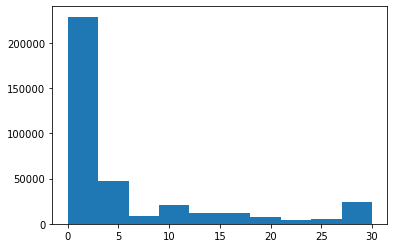

In [47]:
plt.hist(heart_df.alcohol_consumption_30);

#### weights

Values between 50 and 0776 are weights in lbs.  Weights that start with 9___ are weights in kilograms. 9999.0  = refused, 7777 = not sure

In [48]:
heart_df.weight_lbs.value_counts()
#not helpful refer to codebook to get a better sense of distribution between those that reported in kg v lb

200.0     19510
180.0     18309
9999.0    17661
150.0     16463
160.0     16462
          ...  
403.0         1
745.0         1
540.0         1
452.0         1
9240.0        1
Name: weight_lbs, Length: 571, dtype: int64

In [49]:
#want to fill those in with imputation
heart_df.loc[heart_df['weight_lbs'] == 9999.0, 'weight_lbs'] = None
heart_df.loc[heart_df['weight_lbs'] == 7777.0, 'weight_lbs'] = None

In [50]:
#weight conversions 
weight = []

for weights in heart_df['weight_lbs']:
    if weights < 800: #conversion to kg
        weights = round(weights/2.2)
        weight.append(weights)
    elif (weights > 9000) & (weights < 9999):
        weights = str(weights).replace("9","",1)
        weight.append(weights)
    else:
        weight.append(weights)

In [51]:
weight

[48,
 77,
 nan,
 nan,
 57,
 82,
 68,
 68,
 77,
 74,
 61,
 74,
 64,
 136,
 118,
 67,
 98,
 75,
 68,
 77,
 59,
 74,
 84,
 nan,
 59,
 51,
 nan,
 72,
 61,
 73,
 68,
 77,
 77,
 109,
 66,
 82,
 91,
 75,
 86,
 128,
 47,
 100,
 114,
 63,
 54,
 82,
 64,
 64,
 84,
 nan,
 73,
 73,
 105,
 61,
 111,
 80,
 47,
 73,
 70,
 77,
 91,
 86,
 114,
 72,
 109,
 143,
 nan,
 102,
 89,
 89,
 52,
 nan,
 59,
 111,
 68,
 77,
 82,
 72,
 71,
 145,
 58,
 108,
 78,
 110,
 74,
 73,
 118,
 76,
 71,
 91,
 100,
 77,
 97,
 61,
 105,
 75,
 100,
 70,
 59,
 86,
 58,
 76,
 57,
 114,
 105,
 58,
 66,
 70,
 50,
 56,
 87,
 59,
 nan,
 53,
 nan,
 64,
 78,
 68,
 89,
 84,
 nan,
 175,
 66,
 132,
 77,
 98,
 73,
 73,
 95,
 77,
 100,
 82,
 122,
 109,
 105,
 67,
 82,
 55,
 86,
 112,
 59,
 75,
 48,
 118,
 75,
 84,
 84,
 66,
 81,
 109,
 82,
 136,
 93,
 nan,
 109,
 nan,
 67,
 64,
 74,
 148,
 64,
 77,
 96,
 80,
 85,
 91,
 108,
 120,
 84,
 105,
 65,
 64,
 77,
 102,
 68,
 105,
 65,
 82,
 84,
 52,
 106,
 92,
 59,
 89,
 70,
 45,
 80,
 95,
 72,
 69

In [52]:
heart_df.weight_lbs = weight

In [53]:
heart_df.weight_lbs = heart_df.weight_lbs.astype(float)

In [54]:
heart_df.weight_lbs.value_counts()

91.0     19842
82.0     18742
68.0     17116
73.0     16905
77.0     15682
         ...  
239.0        1
291.0        1
207.0        1
224.0        1
267.0        1
Name: weight_lbs, Length: 249, dtype: int64

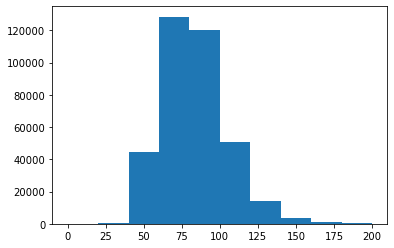

In [55]:
plt.hist(heart_df.weight_lbs,range=(0,200) );

#### Height

In [56]:
heart_df.height_ftandinch.value_counts()

506.0     33417
504.0     32667
507.0     30139
505.0     29496
510.0     28328
          ...  
9132.0        1
9121.0        1
209.0         1
704.0         1
9139.0        1
Name: height_ftandinch, Length: 146, dtype: int64

values between 200-711 represent 0 _ / __ = feet / inches. 9__ - 9___ represent heights in meters/cm. 9999 is still refused and 7777 is not sure.

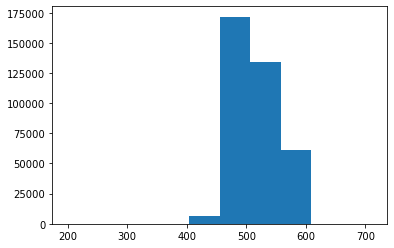

In [57]:
plt.hist(heart_df.height_ftandinch,range=(200,711) );

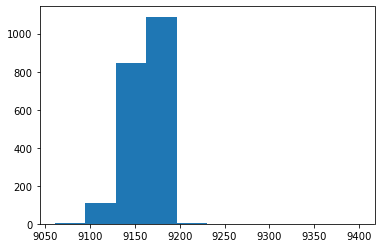

In [58]:
plt.hist(heart_df.height_ftandinch,range=(9061,9400) );

In [59]:
heart_df[(heart_df.height_ftandinch >= 200) & (heart_df.height_ftandinch <= 400)]

,general_health,physical_health,mental_health,health_insurance,health_care_doctors,no_doc_bc_cost,last_checkup,excercise_30,sleep,stroke,asthma,skin_cancer,other_cancer,copd_type_issue,arthritis_anyform,depressive_disorder,kidney_disease,diabetes,education_lvl,rent_own,employment_status,income_level,weight_lbs,height_ftandinch,difficulty_walking,smoke100_lifetime,smokeless_tobacco_products,alcohol_consumption_30,high_risk_situations,ecigaret,coronary_heart_disease,heart_attack,heart_disease
476,4.0,5.0,20.0,1.0,1.0,2.0,1.0,1.0,4.0,2.0,2.0,2.0,2.0,2.0,1.0,1.0,2.0,1.0,4.0,3.0,8.0,2.0,64.0,400.0,2.0,2.0,3.0,0.0,2.0,2.0,2.0,2.0,0
5788,4.0,88.0,88.0,1.0,1.0,1.0,1.0,2.0,8.0,2.0,1.0,2.0,2.0,1.0,1.0,2.0,2.0,3.0,5.0,1.0,7.0,4.0,32.0,400.0,1.0,1.0,3.0,0.0,2.0,2.0,2.0,2.0,0
6344,4.0,88.0,15.0,2.0,7.0,7.0,1.0,2.0,6.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0,3.0,2.0,1.0,7.0,77.0,59.0,400.0,1.0,2.0,3.0,0.0,2.0,2.0,2.0,2.0,0
10272,1.0,88.0,88.0,1.0,1.0,2.0,1.0,2.0,7.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0,3.0,2.0,1.0,8.0,3.0,182.0,400.0,2.0,2.0,3.0,0.0,2.0,NaN,2.0,2.0,0
13449,1.0,88.0,88.0,1.0,1.0,2.0,1.0,1.0,7.0,2.0,1.0,2.0,2.0,2.0,1.0,2.0,2.0,3.0,6.0,1.0,1.0,7.0,98.0,300.0,2.0,2.0,3.0,NaN,2.0,NaN,2.0,2.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395278,3.0,88.0,88.0,1.0,7.0,2.0,1.0,1.0,8.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,4.0,3.0,1.0,77.0,NaN,400.0,2.0,2.0,3.0,0.0,7.0,1.0,2.0,2.0,0
395505,1.0,88.0,88.0,1.0,1.0,2.0,1.0,1.0,8.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,3.0,6.0,1.0,1.0,2.0,51.0,400.0,2.0,2.0,3.0,0.0,2.0,2.0,2.0,2.0,0
396320,4.0,88.0,88.0,1.0,1.0,2.0,1.0,2.0,4.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,3.0,3.0,3.0,5.0,1.0,87.0,400.0,2.0,1.0,3.0,0.0,2.0,1.0,2.0,2.0,0
398291,4.0,88.0,88.0,2.0,3.0,2.0,4.0,2.0,4.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,3.0,4.0,2.0,2.0,1.0,NaN,400.0,NaN,NaN,NaN,NaN,NaN,NaN,2.0,2.0,0


In [60]:
heart_df[(heart_df.height_ftandinch >= 9061)& (heart_df.height_ftandinch <= 9100)]

,general_health,physical_health,mental_health,health_insurance,health_care_doctors,no_doc_bc_cost,last_checkup,excercise_30,sleep,stroke,asthma,skin_cancer,other_cancer,copd_type_issue,arthritis_anyform,depressive_disorder,kidney_disease,diabetes,education_lvl,rent_own,employment_status,income_level,weight_lbs,height_ftandinch,difficulty_walking,smoke100_lifetime,smokeless_tobacco_products,alcohol_consumption_30,high_risk_situations,ecigaret,coronary_heart_disease,heart_attack,heart_disease
13469,2.0,1.0,2.0,1.0,2.0,2.0,1.0,1.0,5.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,6.0,1.0,1.0,8.0,82.0,9090.0,2.0,1.0,3.0,9.0,2.0,NaN,2.0,2.0,0
17026,1.0,88.0,99.0,2.0,3.0,2.0,1.0,1.0,8.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,3.0,4.0,2.0,6.0,1.0,NaN,9100.0,2.0,2.0,3.0,0.0,2.0,NaN,2.0,2.0,0
100971,5.0,30.0,88.0,1.0,1.0,2.0,1.0,2.0,5.0,1.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,3.0,5.0,2.0,7.0,1.0,190.0,9090.0,1.0,1.0,3.0,0.0,2.0,2.0,2.0,2.0,0
333249,4.0,20.0,30.0,2.0,7.0,1.0,1.0,1.0,6.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,4.0,1.0,2.0,1.0,4.0,91.0,9090.0,2.0,1.0,3.0,1.0,2.0,2.0,2.0,2.0,0
363179,3.0,88.0,15.0,2.0,3.0,1.0,3.0,1.0,4.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,3.0,3.0,2.0,1.0,3.0,59.0,9100.0,1.0,1.0,3.0,0.0,2.0,2.0,2.0,2.0,0


#### recoding 88, 7 , 9

**Note** Most of the features have a 88.0 or some form of this to code for none instead of coding it as 0. As such we will now need to go into each column and recode it. I am recoding 88 to 0 to ensure that if any scaling is done, we don't get insane pulling. The 77 means they don't know/remember and 99 is they refused to answer the question. Will need to decide on what type of imputation to do on these ones or whether we'd like to drop it. 

In [61]:
#recoding using all features that contains 88.0, 7.0 and 9.0

def recoding(dataframe):
    for x in dataframe.columns:
        dataframe.loc[dataframe.x == 88.0, dataframe.x] = 0
        dataframe.loc[dataframe.x == 7.0, dataframe.x] = None
        dataframe.loc[dataframe.x == 9.0, dataframe.x] = None

# Next Steps

- figuring out a way to incorporate all of the other types of heart conditions that fall under cardiovascular disease. This projects only looks at heart attack and CAD. While the true scale of the disease expands out to high blood pressure, congenitial heart disease etc.